# Encontros 13 e 14: Datathon

Importando as bibliotecas:

In [1]:
import sys
sys.path.append('..')

import socnet as sn
import numpy as np
import matplotlib.pyplot as plt

from scipy.stats.stats import pearsonr
from scipy.optimize import minimize

Definindo função que calcula *coreness*:

In [2]:
def cost(c, A, mask):
    row = np.matrix(c)

    C = np.multiply(row.transpose(), row)

    correlation, _ = pearsonr(C[~mask].flat, A[~mask].flat)

    return -correlation


def calculate_coreness(g):
    length = g.number_of_nodes()

    c = np.random.rand(length)

    A = sn.build_matrix(g)

    mask = np.eye(length, dtype=bool)

    bounds = [(0, 1) for _ in range(length)]

    result = minimize(cost, c, args=(A, mask), bounds=bounds)

    norm = 0

    for n in g.nodes:
        g.nodes[n]['coreness'] = result['x'][n]

        norm += g.nodes[n]['coreness'] ** 2

    for n in g.nodes:
        g.nodes[n]['coreness'] /= norm

Definindo função que calcula *PageRank*:

In [3]:
def equals(a, b):
    return abs(a - b) < 0.000000001


def calculate_pagerank(g):
    length = g.number_of_nodes()

    k = 10
    scale = 0.8
    residue = (1 - scale) / length

    R = sn.build_matrix(g)

    for n in g.nodes:
        total = np.sum(R[n,])

        if equals(total, 0):
            R[n, n] = 1
        else:
            R[n,] /= total

    R = scale * R + residue

    Rt = R.transpose()

    rank = 1 / length

    r = np.full((length, 1), rank)

    for _ in range(k):
        r = Rt.dot(r)

    for n in g.nodes:
        g.nodes[n]['pagerank'] = r[n, 0]

Lista de todos os códigos de países, para facilitar a iteração pelos arquivos.

Não esqueça que também existem os arquivos `<ano>-all-countries.gml` que representam a soma dos países.

In [4]:
country_codes = [
    'AUS', 'AUT', 'BEL', 'BGR', 'BRA', 'CAN', 'CHN', 'CYP',
    'CZE', 'DEU', 'DNK', 'ESP', 'EST', 'FIN', 'FRA', 'GBR',
    'GRC', 'HUN', 'IDN', 'IND', 'IRL', 'ITA', 'JPN', 'KOR',
    'LTU', 'LUX', 'LVA', 'MEX', 'MLT', 'NLD', 'POL', 'PRT',
    'ROM', 'RUS', 'SVK', 'SVN', 'SWE', 'TUR', 'TWN', 'USA',
]

Lista de todos os códigos de indústrias, para facilitar a iteração pelos arquivos.

Não esqueça que também existem os arquivos `<ano>-all-industries.gml` que representam a soma das indústrias.

In [5]:
industry_codes = [
     'c1',  'c2',  'c3',  'c4',  'c5',  'c6',  'c7',
     'c8',  'c9', 'c10', 'c11', 'c12', 'c13', 'c14',
    'c15', 'c16', 'c17', 'c18', 'c19', 'c20', 'c21',
    'c22', 'c23', 'c24', 'c25', 'c26', 'c27', 'c28',
    'c29', 'c30', 'c31', 'c32', 'c33', 'c34', 'c35',
]

In [6]:
sn.graph_width = 360
sn.graph_height = 360
sn.node_size = 25

def show_graph(g):
    set_colors(g)

    sn.show_graph(g, nlab=True)

In [7]:
years = ['1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007']


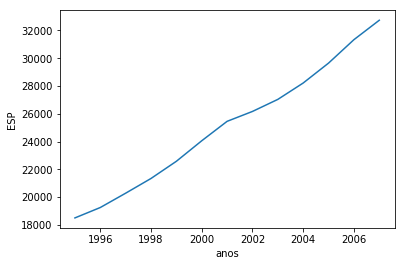

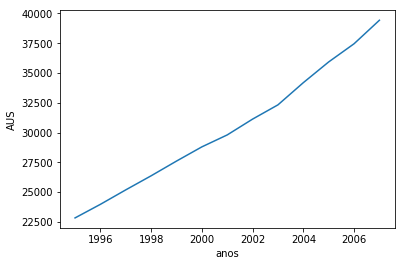

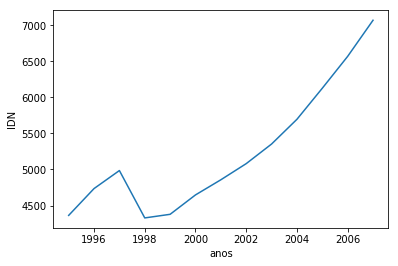

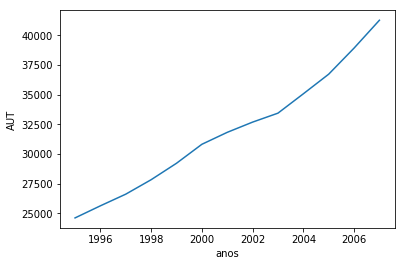

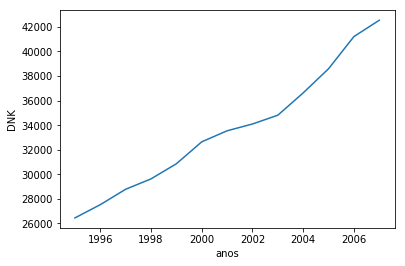

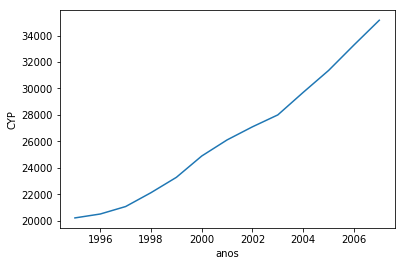

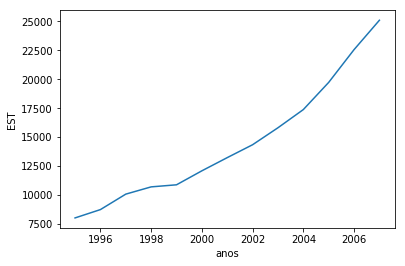

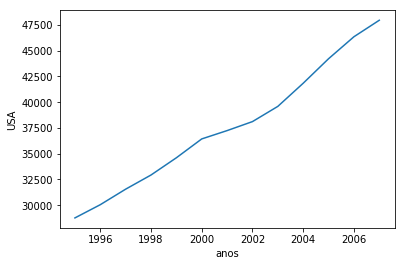

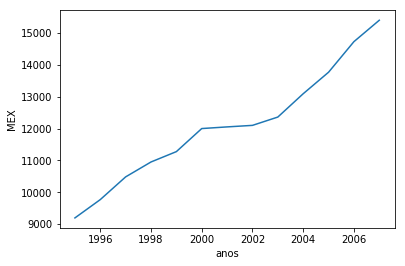

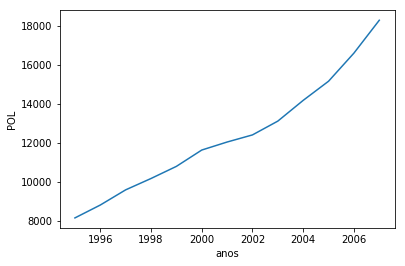

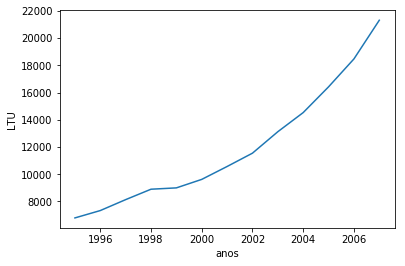

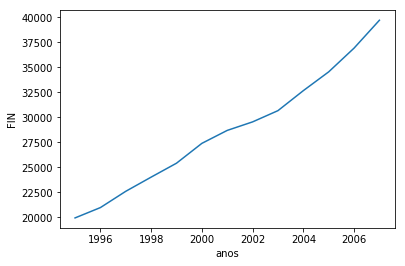

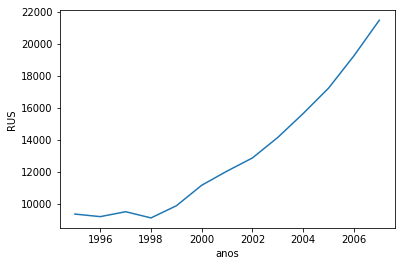

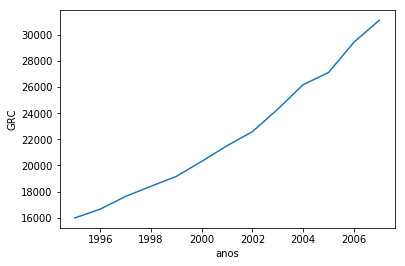

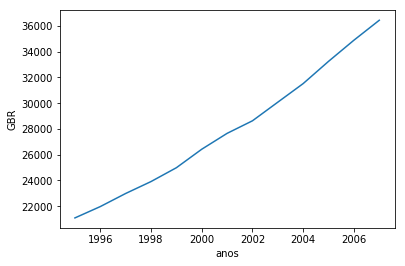

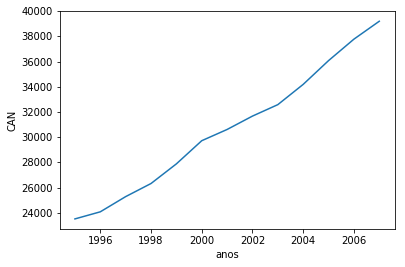

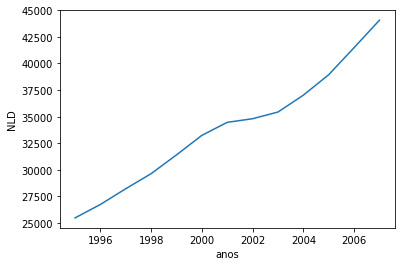

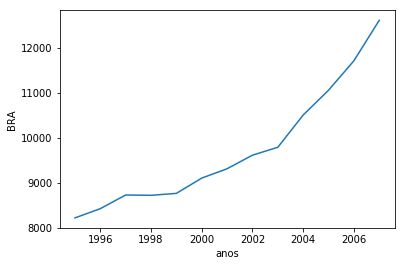

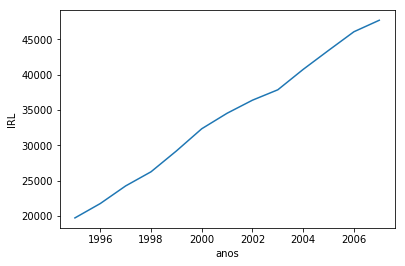

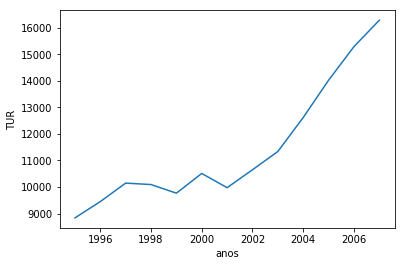

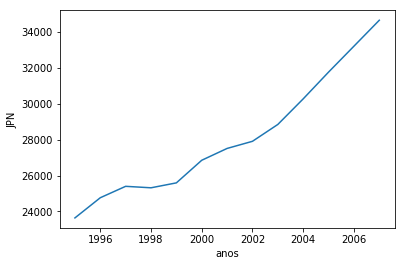

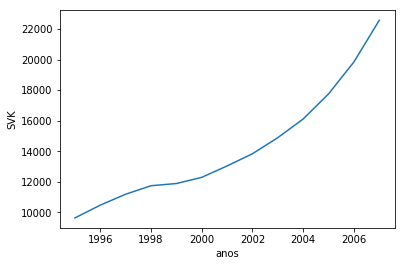

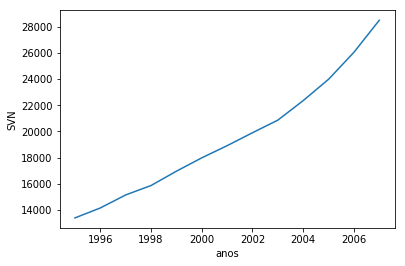

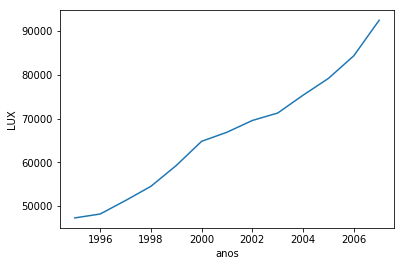

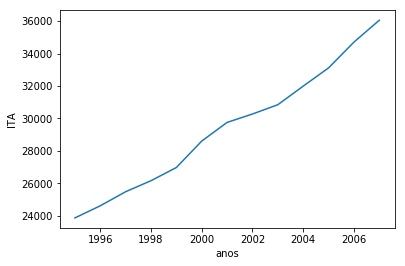

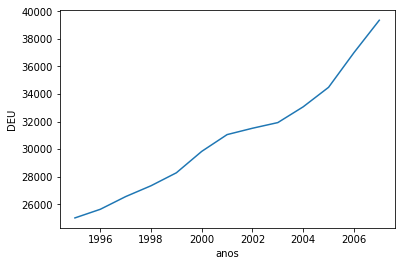

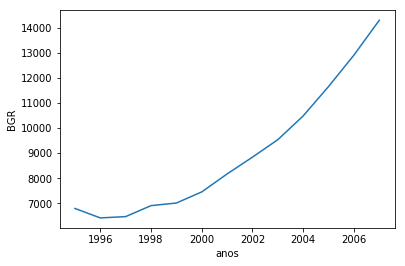

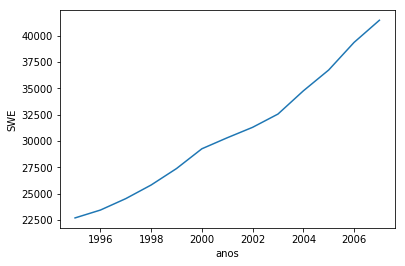

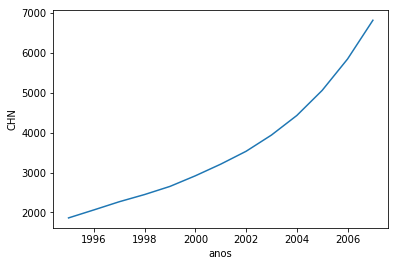

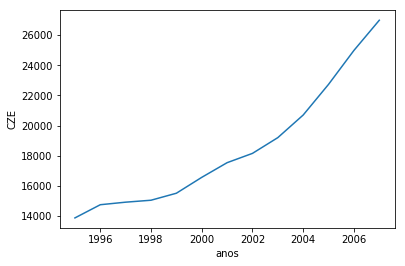

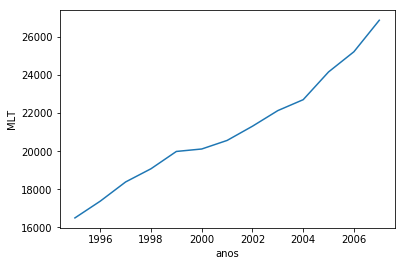

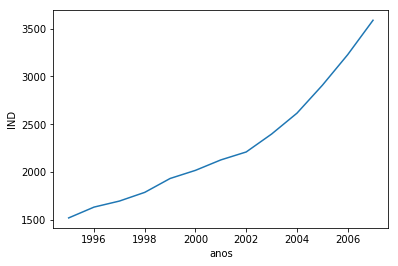

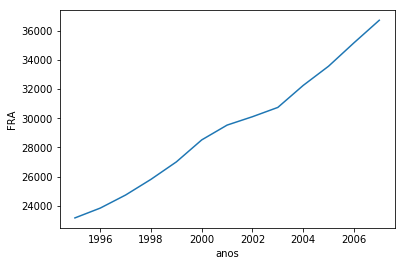

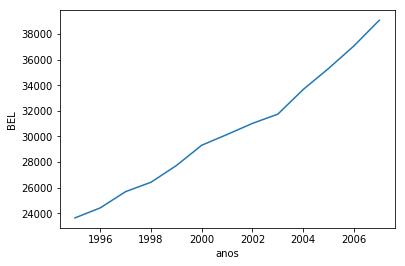

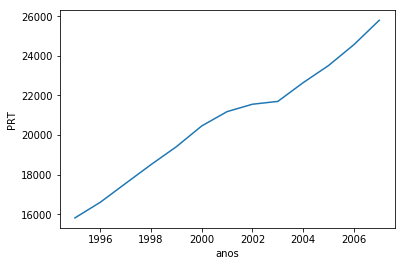

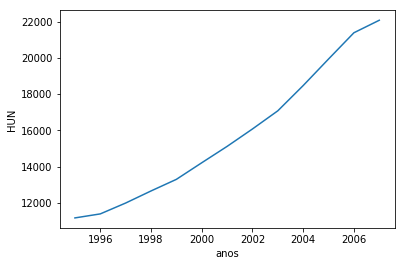

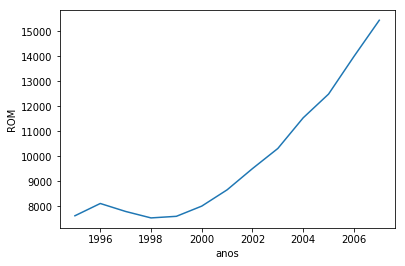

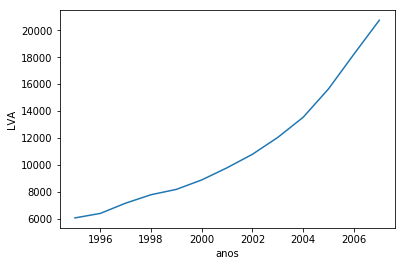

In [8]:
country_pib = {}

for n in years:
    
    g = sn.load_graph('grafos/'+n+'-c15.gml')
    
    for m in g.nodes():
        
        if g.node[m]['code'] not in country_pib:         
            country_pib[''+g.node[m]['code']+''] = []
        
        country_pib[''+g.node[m]['code']+''].append(g.node[m]['gdp'])
        
for n in country_pib:
    plt.plot(years,country_pib[n])
    plt.xlabel("anos")
    plt.ylabel(""+n+"")
    plt.show()
    

In [23]:
industry_coreness = {}
industry_pagerank = {}

for n in years:
    
    
    g = sn.load_graph('grafos/'+n+'-CHN.gml')
    calculate_pagerank(g)
    calculate_coreness(g)
    
    for m in g.nodes():
        if g.node[m]['code'] not in industry_coreness:         
            industry_coreness[''+g.node[m]['code']+''] = []
        
        industry_coreness[''+g.node[m]['code']+''].append(g.node[m]['coreness'])
        
        if g.node[m]['code'] not in industry_pagerank:         
            industry_pagerank[''+g.node[m]['code']+''] = []
        
        industry_pagerank[''+g.node[m]['code']+''].append(g.node[m]['pagerank'])

# for n in industry_coreness:
#     plt.plot(years,industry_coreness[n])
#     plt.xlabel("anos")
#     plt.ylabel(""+n+": coreness")
#     plt.show()
    
# for n in industry_pagerank:
#     plt.plot(years,industry_pagerank[n])
#     plt.xlabel("anos")
#     plt.ylabel(""+n+": pagerank")
#     plt.show()

In [16]:
from operator import itemgetter

for i in range(12):
    lista = []
    for n in industry_coreness:
        lista.append({'value': industry_coreness[n][i], 'name': n})
    ano = 1997 + i
    print(ano)
    print(sorted(lista, key=itemgetter('value'), reverse=True)[:5])

1997
[{'name': 'c1', 'value': 0.65092145030357362}, {'name': 'c3', 'value': 0.45922390956191689}, {'name': 'c22', 'value': 0.081264668864854339}, {'name': 'c6', 'value': 0.078667824166038236}, {'name': 'c18', 'value': 0.036308118944194404}]
1998
[{'name': 'c3', 'value': 0.53258828808476655}, {'name': 'c1', 'value': 0.48162548980223252}, {'name': 'c22', 'value': 0.099550747427454928}, {'name': 'c6', 'value': 0.054049415307729977}, {'name': 'c20', 'value': 0.043988589615611189}]
1999
[{'name': 'c3', 'value': 0.64864929269832361}, {'name': 'c1', 'value': 0.45548310491596972}, {'name': 'c22', 'value': 0.12003702750048999}, {'name': 'c20', 'value': 0.049697471825510778}, {'name': 'c6', 'value': 0.038712002924396326}]
2000
[{'name': 'c3', 'value': 0.66117931005334474}, {'name': 'c1', 'value': 0.45715326305068493}, {'name': 'c22', 'value': 0.1021832194688215}, {'name': 'c20', 'value': 0.047393905483235688}, {'name': 'c6', 'value': 0.027849153132112264}]
2001
[{'name': 'c3', 'value': 0.7136308

In [17]:
from operator import itemgetter

for i in range(12):
    lista = []
    for n in industry_pagerank:
        lista.append({'value': industry_pagerank[n][i], 'name': n})
    ano = 1997 + i
    print(ano)
    print(sorted(lista, key=itemgetter('value'), reverse=True)[:5])

1997
[{'name': 'c31', 'value': 0.17069758896811846}, {'name': 'c18', 'value': 0.097374166930853392}, {'name': 'c22', 'value': 0.065106894981092817}, {'name': 'c3', 'value': 0.053644929029810183}, {'name': 'c20', 'value': 0.042837850345961895}]
1998
[{'name': 'c18', 'value': 0.11414577031075783}, {'name': 'c22', 'value': 0.062471024786456185}, {'name': 'c3', 'value': 0.059022972163704897}, {'name': 'c20', 'value': 0.053378295368012446}, {'name': 'c1', 'value': 0.041126955829742219}]
1999
[{'name': 'c18', 'value': 0.12546216130373192}, {'name': 'c22', 'value': 0.056269456186668398}, {'name': 'c3', 'value': 0.055918017046990551}, {'name': 'c20', 'value': 0.052539700475460388}, {'name': 'c1', 'value': 0.040217176228398301}]
2000
[{'name': 'c18', 'value': 0.085818867657426551}, {'name': 'c20', 'value': 0.06100934989656337}, {'name': 'c3', 'value': 0.058169886076541978}, {'name': 'c16', 'value': 0.056617789806059922}, {'name': 'c22', 'value': 0.048653962346140431}]
2001
[{'name': 'c18', 'val

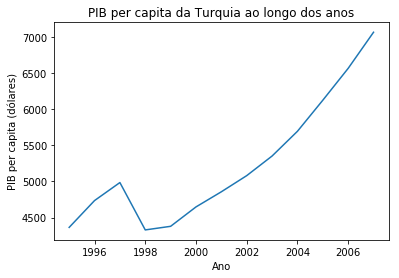

In [18]:
    plt.plot(years,country_pib["IDN"])
    plt.xlabel("Ano")
    plt.ylabel("PIB per capita (dólares)")
    plt.title('PIB per capita da Turquia ao longo dos anos')
    plt.show()

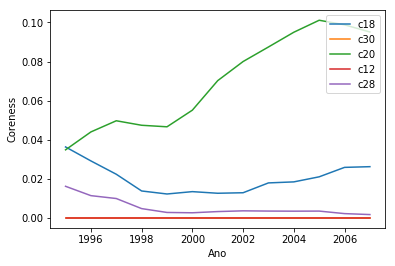

In [19]:
    plt.plot(years,industry_coreness["c1"], label="c1")
    plt.plot(years,industry_coreness["c3"], label="c3")
    plt.plot(years,industry_coreness["c22"], label="c22")
    plt.plot(years,industry_coreness["c12"], label="c12")
    plt.plot(years,industry_coreness["c28"], label="c28")
    plt.xlabel("Ano")
    plt.ylabel("Coreness")
    plt.legend(loc='upper right')
    plt.show()

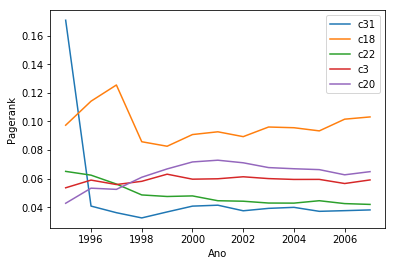

In [22]:
    plt.plot(years,industry_pagerank["c31"], label="c31")
    plt.plot(years,industry_pagerank["c18"], label="c18")
    plt.plot(years,industry_pagerank["c22"], label="c22")
    plt.plot(years,industry_pagerank["c3"], label="c3")
    plt.plot(years,industry_pagerank["c20"], label="c20")
    plt.xlabel("Ano")
    plt.ylabel("Pagerank")
    plt.legend(loc='upper right')
    plt.show()